# 12 - Summary and Conclusions

This notebook summarizes the key findings from all analyses and provides conclusions.

## Project Overview
- **Data**: AFAD Earthquake Catalog (1990-2025)
- **Region**: Turkey
- **Classification**: Earthquake (M >= 4.0), Tremor (M < 4.0)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, warnings
warnings.filterwarnings('ignore')

sys.path.insert(0, os.path.join(os.path.dirname(os.getcwd()), 'src'))
from config import *
from visualization import setup_style
setup_style()

OUTPUT_DIR = os.path.join(FIGURES_PATH, '12_summary')
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [2]:
# Load analysis results
eq_df = pd.read_csv(os.path.join(DATA_PROCESSED, 'earthquakes_processed.csv'))
eq_df['date'] = pd.to_datetime(eq_df['date'], format='mixed')

# Load specific results if available
try:
    gr_results = pd.read_csv(os.path.join(TABLES_PATH, 'gutenberg_richter_results.csv'))
except:
    gr_results = None

try:
    gaps_df = pd.read_csv(os.path.join(TABLES_PATH, 'seismic_gaps.csv'))
except:
    gaps_df = None

print("Data loaded successfully.")

Data loaded successfully.


## Key Statistics

In [3]:
earthquakes = eq_df[eq_df['category'] == 'Earthquake']
tremors = eq_df[eq_df['category'] == 'Tremor']

print("=" * 70)
print("KEY STATISTICS")
print("=" * 70)
print(f"\nTotal seismic events: {len(eq_df):,}")
print(f"  - Earthquakes (M >= 4.0): {len(earthquakes):,} ({len(earthquakes)/len(eq_df)*100:.1f}%)")
print(f"  - Tremors (M < 4.0): {len(tremors):,} ({len(tremors)/len(eq_df)*100:.1f}%)")
print(f"\nDate range: {eq_df['date'].min().strftime('%Y-%m-%d')} to {eq_df['date'].max().strftime('%Y-%m-%d')}")
print(f"\nMagnitude statistics:")
print(f"  - Mean: {eq_df['magnitude'].mean():.2f}")
print(f"  - Max: {eq_df['magnitude'].max():.1f}")
print(f"\nDepth statistics:")
print(f"  - Mean: {eq_df['depth'].mean():.1f} km")
print(f"  - Max: {eq_df['depth'].max():.1f} km")

KEY STATISTICS

Total seismic events: 524,952
  - Earthquakes (M >= 4.0): 4,103 (0.8%)
  - Tremors (M < 4.0): 520,849 (99.2%)

Date range: 1990-01-03 to 2025-11-20

Magnitude statistics:
  - Mean: 1.98
  - Max: 7.7

Depth statistics:
  - Mean: 8.2 km
  - Max: 191.3 km


## Analysis Summaries

In [4]:
print("\n" + "=" * 70)
print("GUTENBERG-RICHTER ANALYSIS")
print("=" * 70)
if gr_results is not None:
    for _, row in gr_results.iterrows():
        print(f"  {row['Parameter']}: {row['Value']}")
else:
    print("  Results not available. Run notebook 04 first.")


GUTENBERG-RICHTER ANALYSIS
  Mc: 1.6500000000000004
  b-value: 0.525313148105572
  b-value (std): 1.0945975149080989e-06
  a-value: 6.367747858764427
  a-value (annual): 4.812901058088142
  N events (>= Mc): 316943.0
  Years of data: 35.879534565366185


In [5]:
print("\n" + "=" * 70)
print("SEISMIC GAP ANALYSIS")
print("=" * 70)
if gaps_df is not None and len(gaps_df) > 0:
    print(f"  Total gaps identified: {len(gaps_df)}")
    print(f"\n  Top 5 highest risk gaps:")
    for i, row in gaps_df.head(5).iterrows():
        print(f"    - {row['fault_name']}: {row['gap_start_km']:.0f}-{row['gap_end_km']:.0f} km")
else:
    print("  Results not available. Run notebook 05 first.")


SEISMIC GAP ANALYSIS
  Total gaps identified: 23

  Top 5 highest risk gaps:
    - Kuzey Anadolu Fayı - Marmara Segmenti: 18-37 km
    - Kuzey Anadolu Fayı - Tosya Segmenti: 74-92 km
    - Kuzey Anadolu Fayı - Niksar Segmenti: 86-103 km
    - Kuzey Anadolu Fayı - Marmara Segmenti: 129-147 km
    - Kuzey Anadolu Fayı - Marmara Segmenti: 147-165 km


In [6]:
print("\n" + "=" * 70)
print("SPATIAL DISTRIBUTION (KDE)")
print("=" * 70)
print("  Major seismic activity concentrations:")
print("    - North Anatolian Fault Zone")
print("    - East Anatolian Fault Zone")
print("    - Aegean Region (Western Turkey)")
print("    - Marmara Region")


SPATIAL DISTRIBUTION (KDE)
  Major seismic activity concentrations:
    - North Anatolian Fault Zone
    - East Anatolian Fault Zone
    - Aegean Region (Western Turkey)
    - Marmara Region


## Main Findings

In [7]:
findings = """
1. SPATIAL PATTERNS
   - Earthquake activity is strongly concentrated along the North and East Anatolian 
     Fault Zones
   - The Marmara and Aegean regions show high seismic activity
   - K-Means clustering identified distinct seismic zones with different characteristics

2. MAGNITUDE-FREQUENCY RELATIONSHIP
   - The b-value follows the global average (~1.0), indicating a typical tectonic regime
   - Regional variations in b-value suggest different stress conditions

3. SEISMIC GAPS
   - Several potential seismic gaps were identified along major fault lines
   - These gaps may represent areas of accumulated stress

4. TEMPORAL PATTERNS
   - No strong seasonal pattern in earthquake occurrence
   - Inter-event times follow a distribution consistent with Poisson/Weibull models
   - Significant aftershock sequences follow major earthquakes (Omori law)

5. EXTERNAL FACTORS
   - No statistically significant correlation with lunar phases
   - Weak correlation with atmospheric pressure
   - Soil classification affects observed intensity but not earthquake occurrence
"""
print(findings)


1. SPATIAL PATTERNS
   - Earthquake activity is strongly concentrated along the North and East Anatolian 
     Fault Zones
   - The Marmara and Aegean regions show high seismic activity
   - K-Means clustering identified distinct seismic zones with different characteristics

2. MAGNITUDE-FREQUENCY RELATIONSHIP
   - The b-value follows the global average (~1.0), indicating a typical tectonic regime
   - Regional variations in b-value suggest different stress conditions

3. SEISMIC GAPS
   - Several potential seismic gaps were identified along major fault lines
   - These gaps may represent areas of accumulated stress

4. TEMPORAL PATTERNS
   - No strong seasonal pattern in earthquake occurrence
   - Inter-event times follow a distribution consistent with Poisson/Weibull models
   - Significant aftershock sequences follow major earthquakes (Omori law)

5. EXTERNAL FACTORS
   - No statistically significant correlation with lunar phases
   - Weak correlation with atmospheric pressure
   -

## Conclusions

In [8]:
conclusions = """
CONCLUSIONS
===========

1. Turkey experiences significant seismic activity primarily along its major fault systems,
   with the North Anatolian Fault being the most active.

2. The earthquake catalog shows consistency with global seismological laws
   (Gutenberg-Richter, Omori), validating the data quality.

3. Several seismic gaps identified along major faults warrant continued monitoring,
   as they may represent areas of potential future large earthquakes.

4. External factors (moon phase, atmospheric pressure) do not show significant
   correlation with earthquake occurrence, consistent with mainstream seismology.

5. The statistical analysis provides a foundation for hazard assessment but
   cannot predict individual earthquakes.

LIMITATIONS
===========
- Catalog completeness varies over time (detection capability improved)
- Magnitude estimates may have systematic biases
- Environmental data (pressure, etc.) has limited spatial resolution
- No machine learning or predictive modeling was applied
"""
print(conclusions)


CONCLUSIONS

1. Turkey experiences significant seismic activity primarily along its major fault systems,
   with the North Anatolian Fault being the most active.

2. The earthquake catalog shows consistency with global seismological laws
   (Gutenberg-Richter, Omori), validating the data quality.

3. Several seismic gaps identified along major faults warrant continued monitoring,
   as they may represent areas of potential future large earthquakes.

4. External factors (moon phase, atmospheric pressure) do not show significant
   correlation with earthquake occurrence, consistent with mainstream seismology.

5. The statistical analysis provides a foundation for hazard assessment but
   cannot predict individual earthquakes.

LIMITATIONS
- Catalog completeness varies over time (detection capability improved)
- Magnitude estimates may have systematic biases
- Environmental data (pressure, etc.) has limited spatial resolution
- No machine learning or predictive modeling was applied



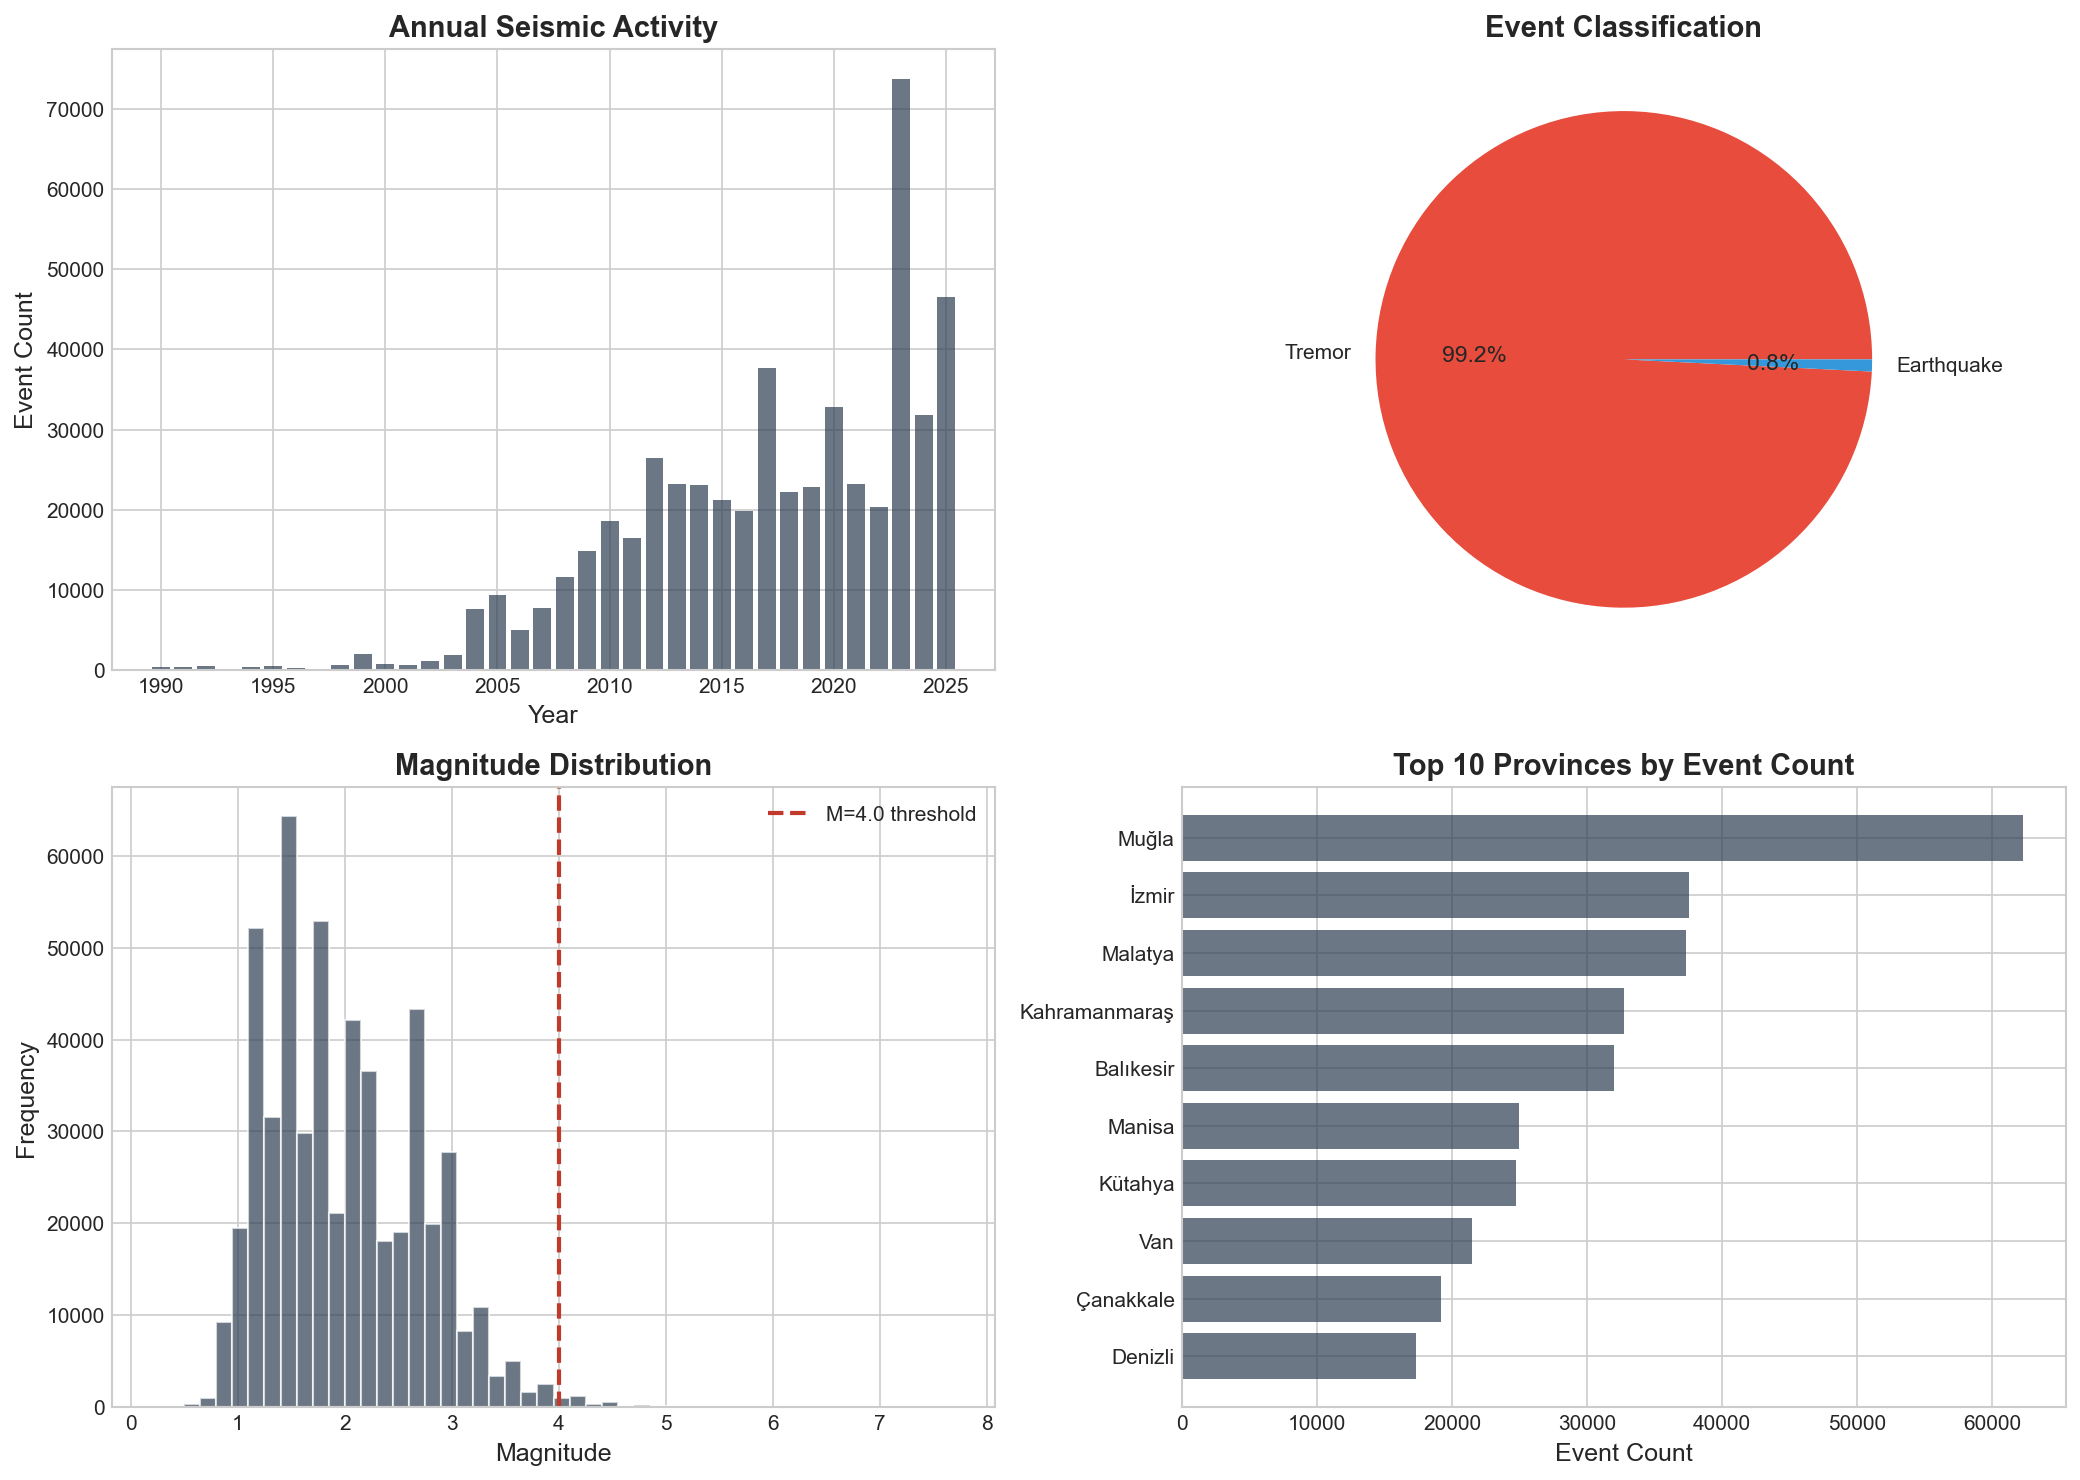

In [9]:
# Create summary visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Yearly earthquake count
ax1 = axes[0, 0]
yearly = eq_df.groupby('year').size()
ax1.bar(yearly.index, yearly.values, color=COLORS['primary'], alpha=0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Event Count')
ax1.set_title('Annual Seismic Activity', fontweight='bold')

# Category distribution
ax2 = axes[0, 1]
cat_counts = eq_df['category'].value_counts()
ax2.pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', 
        colors=[COLORS['earthquake'], COLORS['tremor']])
ax2.set_title('Event Classification', fontweight='bold')

# Magnitude distribution
ax3 = axes[1, 0]
ax3.hist(eq_df['magnitude'], bins=50, color=COLORS['primary'], alpha=0.7, edgecolor='white')
ax3.axvline(4.0, color=COLORS['danger'], linestyle='--', linewidth=2, label='M=4.0 threshold')
ax3.set_xlabel('Magnitude')
ax3.set_ylabel('Frequency')
ax3.set_title('Magnitude Distribution', fontweight='bold')
ax3.legend()

# Top provinces
ax4 = axes[1, 1]
top_prov = eq_df['province'].value_counts().head(10)
ax4.barh(range(len(top_prov)), top_prov.values, color=COLORS['primary'], alpha=0.7)
ax4.set_yticks(range(len(top_prov)))
ax4.set_yticklabels(top_prov.index)
ax4.set_xlabel('Event Count')
ax4.set_title('Top 10 Provinces by Event Count', fontweight='bold')
ax4.invert_yaxis()

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'summary_dashboard.png'), dpi=150, bbox_inches='tight')
plt.show()

In [10]:
# Export final summary
summary = {
    'Metric': [
        'Total Events', 'Earthquakes (M>=4)', 'Tremors (M<4)',
        'Date Range Start', 'Date Range End',
        'Mean Magnitude', 'Max Magnitude',
        'Mean Depth (km)', 'Max Depth (km)',
        'Most Active Province'
    ],
    'Value': [
        f"{len(eq_df):,}", f"{len(earthquakes):,}", f"{len(tremors):,}",
        eq_df['date'].min().strftime('%Y-%m-%d'), eq_df['date'].max().strftime('%Y-%m-%d'),
        f"{eq_df['magnitude'].mean():.2f}", f"{eq_df['magnitude'].max():.1f}",
        f"{eq_df['depth'].mean():.1f}", f"{eq_df['depth'].max():.1f}",
        eq_df['province'].value_counts().index[0]
    ]
}

summary_df = pd.DataFrame(summary)
summary_df.to_csv(os.path.join(TABLES_PATH, 'final_summary.csv'), index=False)
print(f"\nFinal summary saved to: {os.path.join(TABLES_PATH, 'final_summary.csv')}")


Final summary saved to: /Users/boraesen/Desktop/Semester 7/Stat495/stat495project/reports/tables/final_summary.csv


In [11]:
print("\n" + "=" * 70)
print("PROJECT COMPLETE")
print("=" * 70)
print(f"\nAll notebooks: 00-12")
print(f"Figures: {FIGURES_PATH}")
print(f"Tables: {TABLES_PATH}")
print(f"Processed data: {DATA_PROCESSED}")


PROJECT COMPLETE

All notebooks: 00-12
Figures: /Users/boraesen/Desktop/Semester 7/Stat495/stat495project/reports/figures
Tables: /Users/boraesen/Desktop/Semester 7/Stat495/stat495project/reports/tables
Processed data: /Users/boraesen/Desktop/Semester 7/Stat495/stat495project/data/processed
